In [1]:
import json
from collections import Counter
from datetime import datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
review = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_review.json", chunksize = 10000, lines= True)

In [3]:
review_chunk = next(review)
print(review_chunk.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [4]:
review_df = pd.DataFrame(review_chunk)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
#will use userid,business id, stars and date columns
review_df=review_df.drop(['review_id','useful','funny','cool','text'], axis=1)

In [6]:
review_df.head()

,user_id,business_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15


In [7]:
business = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_business.json", chunksize = 10000, lines= True)
business_chunk = next(business)
business_chunk.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:
business_df = pd.DataFrame(business_chunk)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
#will use userid,business id, stars and date columns
business_df=business_df.drop(['address','city','state','postal_code','longitude','latitude','stars','review_count','is_open','attributes','categories','hours'], axis=1)

In [10]:
business_df.head()

,business_id,name
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ"
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store
2,tUFrWirKiKi_TAnsVWINQQ,Target
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery


In [11]:
# Extract the year from the 'date' column
review_df['year'] = pd.to_datetime(review_df['date']).dt.year


In [12]:
review_df.head()

,user_id,business_id,stars,date,year
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,2018
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18,2012
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30,2014
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,2015
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15,2017


In [13]:
data_df=pd.merge(review_df, business_df)
data_df.head()

,user_id,business_id,stars,date,year,name
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,2018,Turning Point of North Wales
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,2017-05-13 17:06:55,2017,Turning Point of North Wales
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2017-08-08 00:58:18,2017,Turning Point of North Wales
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,2017-11-19 02:20:23,2017,Turning Point of North Wales
4,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,2015,Zaika


In [14]:
min_user_id = data_df['user_id'].min()
min_user_id

'--_r6E98SNIrGU7weyNxbw'

In [15]:
# Create a mapping between string IDs and numerical IDs
user_id_unique = data_df['user_id'].unique()
user_id_mapping = {user_id: idx for idx, user_id in enumerate(user_id_unique)}

# Add a new column with numerical user IDs
data_df['user_id_new'] = data_df['user_id'].map(user_id_mapping)

# Create a mapping between string IDs and numerical IDs
busi_id_unique = data_df['business_id'].unique()
busi_id_mapping = {busi_id: idx for idx, busi_id in enumerate(busi_id_unique)}

# Add a new column with numerical user IDs
data_df['busi_id_new'] = data_df['business_id'].map(busi_id_mapping)

In [16]:
#remove default indexes
data_df = data_df.reset_index(drop=True)
data_df.head()

,user_id,business_id,stars,date,year,name,user_id_new,busi_id_new
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,2018,Turning Point of North Wales,0,0
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,2017-05-13 17:06:55,2017,Turning Point of North Wales,1,0
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2017-08-08 00:58:18,2017,Turning Point of North Wales,2,0
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,2017-11-19 02:20:23,2017,Turning Point of North Wales,3,0
4,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,2015,Zaika,4,1


In [17]:
data_df=data_df.drop(['user_id','business_id'], axis=1)


In [19]:
data_df

,stars,date,year,name,user_id_new,busi_id_new
0,3,2018-07-07 22:09:11,2018,Turning Point of North Wales,0,0
1,2,2017-05-13 17:06:55,2017,Turning Point of North Wales,1,0
2,4,2017-08-08 00:58:18,2017,Turning Point of North Wales,2,0
3,3,2017-11-19 02:20:23,2017,Turning Point of North Wales,3,0
4,5,2015-01-04 00:01:03,2015,Zaika,4,1
...,...,...,...,...,...,...
6767,5,2011-02-15 14:44:31,2011,Papa Murphy's,6527,2622
6768,5,2018-03-15 23:43:33,2018,Enterprise Rent-A-Car,6528,2623
6769,1,2011-02-13 21:10:05,2011,Jones West Ford,6529,2624
6770,3,2015-12-21 03:26:13,2015,Aradia Fitness Edmonton _ Whyte ave,6530,2625


In [20]:
min_user_id = data_df['user_id_new'].min()
min_user_id

0

In [21]:
max_user_id = data_df['user_id_new'].max()
max_user_id

6531

In [22]:
min_busi_id = data_df['busi_id_new'].min()
min_busi_id

0

In [23]:
max_busi_id = data_df['busi_id_new'].max()
max_busi_id

2626

In [24]:
data_df['stars'].describe()

count    6772.000000
mean        3.859421
std         1.345289
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64

In [25]:
distinct_years = data_df['year'].unique()
distinct_years

array([2018, 2017, 2015, 2014, 2010, 2016, 2009, 2013, 2011, 2012, 2005,
       2007, 2008, 2006])

In [26]:
# Sort the data by date
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.sort_values(by='date')
data_df

#dataframe is sorted according to date so when splitting data we can use the recent reviews on testing data and rest for training.

,stars,date,year,name,user_id_new,busi_id_new
690,5,2005-03-01 17:47:15,2005,Paradise Cafe,688,87
3361,5,2005-03-09 07:23:26,2005,Caruso's,3290,740
2794,3,2005-03-12 03:47:06,2005,Sher-e-Punjab,2744,575
5612,3,2005-03-14 23:43:07,2005,Unique General Store,5434,1722
4455,4,2005-05-11 04:16:34,2005,Bellacino's Pizza & Grinders,4339,1149
...,...,...,...,...,...,...
2111,5,2018-10-04 16:18:51,2018,Budget Motors,2077,388
4056,2,2018-10-04 17:11:00,2018,Zac's Pancake House,3959,971
3040,3,2018-10-04 17:33:25,2018,Sockeye Brewing,2981,636
671,3,2018-10-04 18:20:00,2018,The Pancake Pantry,669,83


In [29]:
from sklearn.model_selection import train_test_split

stars_train, stars_test = train_test_split(
    data_df, test_size=0.2, random_state=0,shuffle=False)

user_id_train = np.array(stars_train['user_id_new'])
busi_id_train = np.array(stars_train['busi_id_new'])
stars_train = np.array(stars_train['stars'])

user_id_test = np.array(stars_test['user_id_new'])
busi_id_test = np.array(stars_test['busi_id_new'])
stars_test = np.array(stars_test['stars'])
# data is not shuffled, can split and get the user's recent reviews in the test set and remaining for training

print("testing data: ",stars_test.shape, "\ntraining data: ",stars_train.shape)

testing data:  (1355,) 
training data:  (5417,)


In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from keras.optimizers import Adam

#definition of embedding sizes
embedding_size = 64;

user_input = Input(shape=[1], name='user_id_new')
business_input = Input(shape=[1], name='busi_id_new')

embedding_user = Embedding(output_dim=embedding_size, input_dim=max_user_id + 1, input_length=1)(user_input)
embedding_busi = Embedding(output_dim=embedding_size, input_dim=max_busi_id + 1, input_length=1)(business_input)

user_vec = Flatten()(embedding_user)
busi_vec = Flatten()(embedding_busi)

concatenated = Concatenate()([user_vec, busi_vec])

dropout = Dropout(0.5)
dense = Dense(64, activation='relu')(concatenated)
output = Dense(1)(dense)

model = Model(inputs=[user_input, business_input], outputs=output)
model.compile(optimizer="adam", loss='mse')



In [39]:
initial_train_preds = model.predict([user_id_train, busi_id_train])
initial_train_preds.shape

170/170 [==============================] - 0s 936us/step


(5417, 1)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Squared Error (MSE):" , mean_squared_error(initial_train_preds, stars_train))
print("Mean Absolute Error (MAE):" , mean_absolute_error(initial_train_preds, stars_train))

Mean Squared Error (MSE): 16.413468501711037
Mean Absolute Error (MAE): 3.8260904302043803


In [41]:
#model training
history = model.fit([user_id_train, busi_id_train], stars_train,
                    batch_size=64, epochs=10, validation_split=0.1,
                    shuffle=True)

Epoch 1/10
77/77 [==============================] - 1s 7ms/step - loss: 13.2466 - val_loss: 9.6797
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 3.6979 - val_loss: 4.2009
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.9100 - val_loss: 4.1241
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2170 - val_loss: 4.0618
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.1035 - val_loss: 4.1096
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0811 - val_loss: 4.0581
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0793 - val_loss: 4.0880
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0733 - val_loss: 4.0107
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0687 - val_loss: 4.0190
Epoch 10/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0650 - val_loss: 3.9665


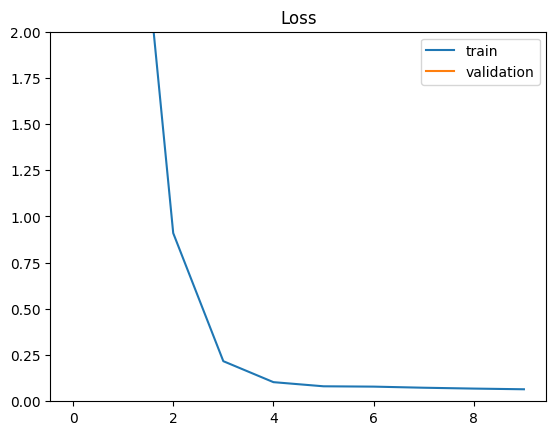

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Loss');

43/43 [==============================] - 0s 2ms/step
Final test MSE: 4.555
Final test MAE: 1.836


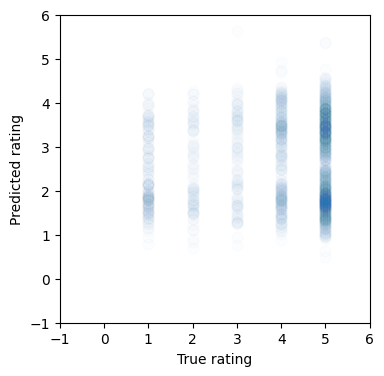

In [47]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(4, 4))
    plt.xlim(-1, 6)
    plt.xlabel("True rating")
    plt.ylim(-1, 6)
    plt.ylabel("Predicted rating")
    plt.scatter(y_true, y_pred, s=60, alpha=0.01)

test_preds = model.predict([user_id_test, busi_id_test])
print("Final test MSE: %0.3f" % mean_squared_error(test_preds, stars_test))
print("Final test MAE: %0.3f" % mean_absolute_error(test_preds, stars_test))
plot_predictions(stars_test, test_preds)

170/170 [==============================] - 0s 786us/step
Final train MSE: 0.442
Final train MAE: 0.302


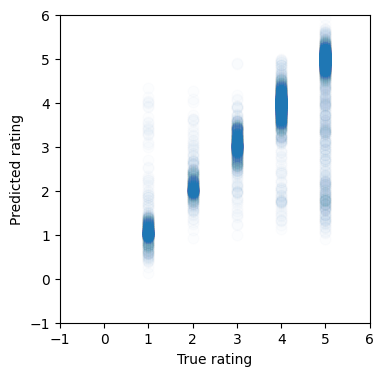

In [48]:
train_preds = model.predict([user_id_train, busi_id_train])
print("Final train MSE: %0.3f" % mean_squared_error(train_preds, stars_train))
print("Final train MAE: %0.3f" % mean_absolute_error(train_preds, stars_train))
plot_predictions(stars_train, train_preds)

In [ ]:
# Calculate cosine similarities
restaurant_embedding_layer = model.get_layer('restaurant_embedding')
restaurant_embeddings = restaurant_embedding_layer.get_weights()[0]